In [109]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [110]:
# Load the data
transaction = pd.read_excel(r"/content/QVI_transaction_data.xlsx")

In [111]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [112]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [113]:
# Check TXN_ID duplicate ID
transaction.TXN_ID.duplicated().sum()

1709

##### Missing data

In [114]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

- Zero null value in Our data provided

#### PROD_NAME
### PROD_NAME
- PROD_NAME is kind of long phrases with nonsense line, in this part I ahould be better to clean it and reduce the size of each item to one or two words with meaningful items
- As we are only interested in words that will tell us if the product is chips or not, let’s remove all words with
digits and special characters such as ‘&’ from our set of product words.



In [115]:

# remove the letter 'g' at the end of each row and all non-alphabetic characters
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace(r'[^a-zA-Z]+g?G?\s*$', '', regex = True).str.replace("S/","").str.replace("&","").str.replace(r"\d+","")

In [116]:
# Checking 10 rows
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly CreamOnion,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour CreamChives,2,7.2


 - Date column became more readable an more useful with Date format which can be used to do time series forecasting and analysis throughout the time

In [117]:
# Covert DATE from digit to a date format
transaction['DATE'] = pd.to_datetime(pd.to_numeric(transaction['DATE'],errors='coerce'),unit = "D", origin = "1899-12-30")
transaction["DATE"]

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [118]:
transaction["DATE"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 264836 entries, 0 to 264835
Series name: DATE
Non-Null Count   Dtype         
--------------   -----         
264836 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.0 MB


= As We can see above that the DATE column is converted from integer to Datetime

#### STORE_NBR

226    2022
88     1873
93     1832
165    1819
237    1785
43     1771
40     1764
230    1751
213    1747
156    1747
Name: STORE_NBR, dtype: int64


<Axes: title={'center': 'THE BEST 10 STORES'}>

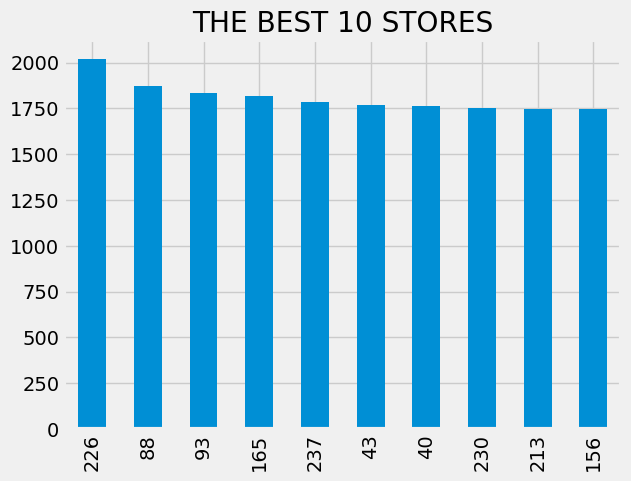

In [119]:
# The best 10 stores listed
print(transaction["STORE_NBR"].value_counts()[:10])
# the best 10 Store Number graph
transaction["STORE_NBR"].value_counts()[:10].plot.bar(title= "THE BEST 10 STORES")

- It can be seen that the *Store* with number **226** is the most frequent store with **2022** times followed by the **Store 88** with **1873** times

#### PRODUCT_NBR

In [120]:
len(transaction["PROD_NBR"].unique())

114

114 Is the number of the unique Products with no duplication

- There were *114* unique purchased product

102    3304
108    3296
33     3269
112    3268
75     3265
Name: PROD_NBR, dtype: int64


<Axes: >

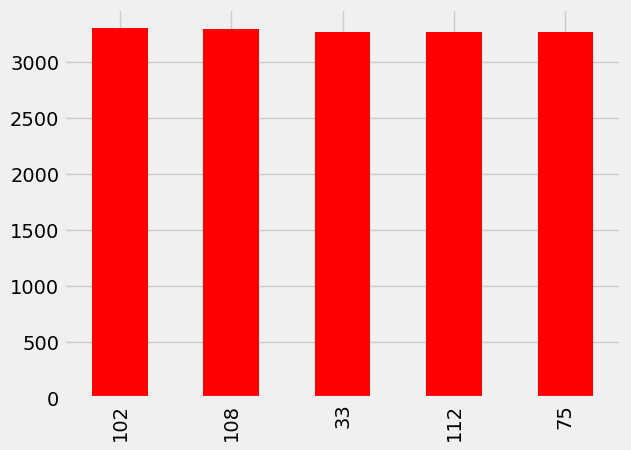

In [121]:
# The best 10 Products and most purchased
print(transaction["PROD_NBR"].value_counts()[:5])
transaction["PROD_NBR"].value_counts()[:5].plot.bar(color = 'r')

The most purchased products are, at first **102 108 33 112 75 **  with more than 3000 times

#### PROD_NBR	PROD_NAME

## Let's get the right name of each product and its number

In [122]:
prod = pd.Series(transaction.PROD_NBR.unique())  #.nunique()

In [123]:
name=pd.Series(transaction.PROD_NAME.unique())   #.nunique()

In [124]:
ls = []

for x in range(len(prod)):
  y = name[x]
  z = prod[x]
  lst = [y,z]
  ls.append(lst)

In [125]:
# list of 10 of each product with the number representative
pd.DataFrame(ls[:10])

,0,1
0,Natural Chip Compny SeaSalt,5
1,CCs Nacho Cheese,66
2,Smiths Crinkle Cut Chips Chicken,61
3,Smiths Chip Thinly CreamOnion,69
4,Kettle Tortilla ChpsHnyJlpno Chili,108
5,Old El Paso Salsa Dip Tomato Mild,57
6,Smiths Crinkle Chips Salt Vinegar,16
7,Grain Waves Sweet Chilli,24
8,Doritos Corn Chip Mexican Jalapeno,42
9,Grain Waves Sour CreamChives,52


In [126]:
len(ls)

114

All the work above was done to ensure that each product ahas a unique PROD_NBR

#### TOT_SALE Distribution

In [127]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


#### Detecting outliers

- 1_ PROD_QTY

PRO_QTY is my choice to detect outliers and as we can notice in the table above that the maximum in one transaction is 200 in the other hand the 1st,2nd, 3rd Quartiles are  much lower than 200, which means that 200 is a sign of outlier, lets use some functions to confirm

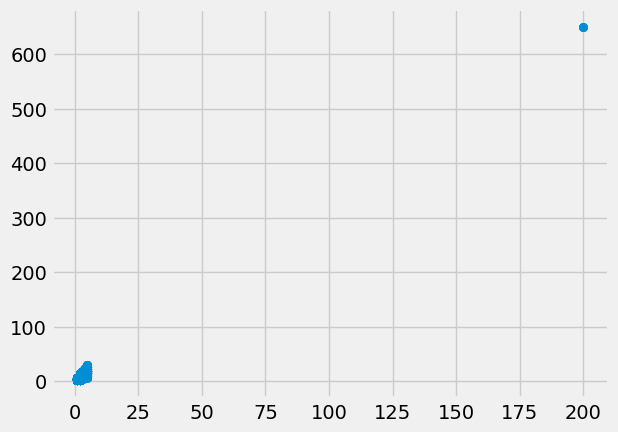

In [128]:
#Scatter  to visuailze how the data distributed
plt.scatter(transaction["PROD_QTY"],transaction["TOT_SALES"])


- It is abvious in the illustration above that we have transactions with  PROD_QTY = 200
- in the next part We make visualization with and without outliers concedering the transaction of 200 as outlier and make comparison of how outliers can effect the data
- At first. Let's extract the costumer and how many times the purchase happened   

In [129]:
outliers_row  = transaction.loc[transaction['PROD_QTY'] == 200]
outliers_row

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0


The extraction above shows that the customer bought Chips in two different days, the customer hold the loyality card (226000)

In [130]:
# Let's see if the customer has had any other transactions with 226000 Loyality_card_number

outliers_row  = transaction.loc[transaction['LYLTY_CARD_NBR'] == 226000]
outliers_row

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail
customer. The customer might be buying chips for commercial purposes instead. We’ll remove this loyalty
card number from further analysis.


In the graph above we can see how outliers effect our Data and the analysis, which means We should be aware about Outliers in each case, and how the data normally distributed which for sure can be more helpful for our analysis instead of data with outliers

### Working on removing outliers

> Because of removing outliers is very sensitive in Data analysis,Outliers can be detected using visualization, implementing mathematical formulas on the dataset, or using the statistical approach.l ike z_score, IQR Q! and Q3,but in our case We want just to remove the customer with 200 and Loyality card number of 226000, this approach is considered the best to get good results and insights.





<Axes: ylabel='PROD_QTY'>

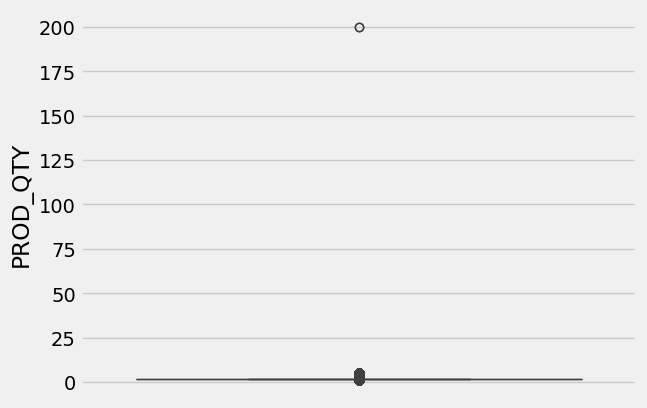

In [131]:
# Box Plot to showcase outliers
import seaborn as sns
sns.boxplot(transaction['PROD_QTY'])



In [132]:
# Remove Outliers
# In this case, We use loc command instead of complicated code

transaction  = transaction.loc[transaction['LYLTY_CARD_NBR'] != 226000]
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly CreamOnion,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8


In [133]:
# The code below shows how outliers removed from the DataFrame
outliers_check = transaction.loc[transaction['LYLTY_CARD_NBR'] == 226000]
outliers_check

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [134]:
# DataFrame summary after removing outliers

transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


- Depending on the summary above, It looks better now to move to the next step where We can work with DATES to get more insights

In [135]:
# How much unique days We have in our dataset
transaction["DATE"].nunique()

364

- The dataset is approximately for one year



In [136]:
transaction.sort_values(by = "DATE", inplace = True) # Sort the DATES
# lets get the first and the last rows from concedering DATE column as an index,
pd.concat([transaction.head(1),transaction.tail(1)])

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
205333,2018-07-01,24,24109,20881,54,CCs Original,2,4.2
6570,2019-06-30,28,28004,24553,98,NCC Sour Cream Garden Chives,2,6.0


- lets Visualize the total sales through the time

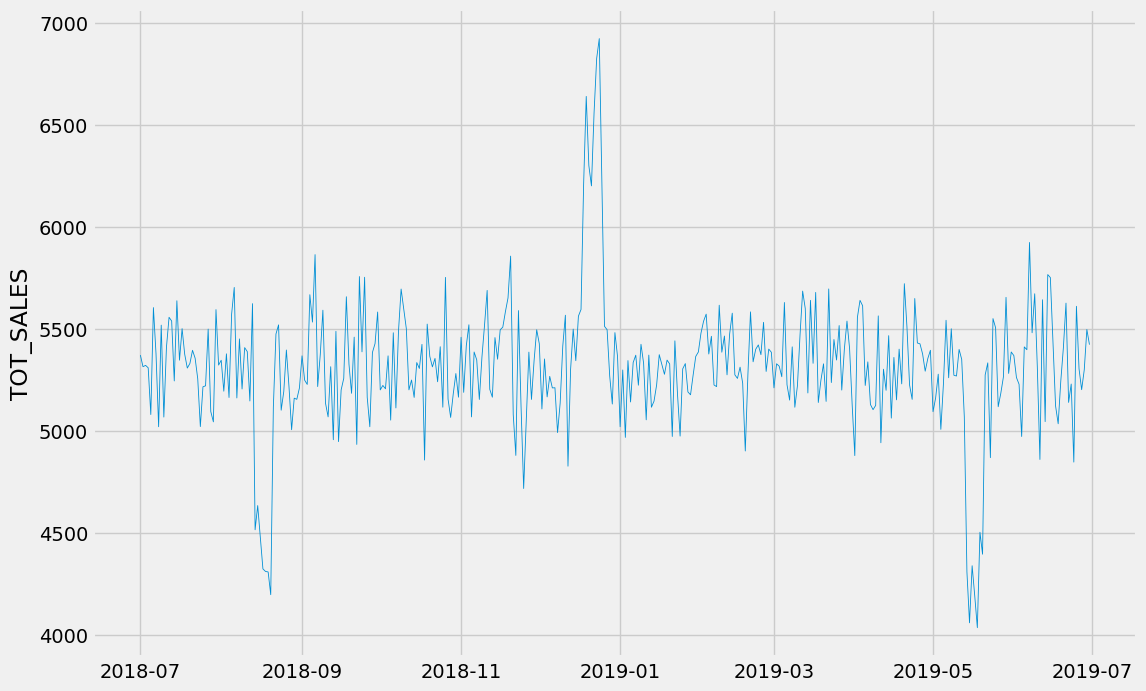

In [137]:
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")

# setting figure size to 12, 10
plt.figure(figsize=(12, 8))

transaction_per_time = transaction.groupby("DATE")['TOT_SALES'].sum()
# Labelling the axes and setting
plt.ylabel("TOT_SALES")
plt.plot(transaction_per_time, linewidth = .6)


We can see that there is an increase in purchases in December (The End of the year) and a break in late December. And decrease in purchases in the last days of August 2018 and May 2019

#### ROD_NBR	 & PROD_QTY

In [138]:
group_PROD_NBR = transaction[['PROD_NBR','PROD_QTY']]
grouped_PROD = group_PROD_NBR.groupby(['PROD_NBR']).sum()
grouped_PROD.sort_values(['PROD_QTY'],ascending=False)[:10]

,PROD_QTY
PROD_NBR,
102,6381
108,6309
75,6277
33,6256
74,6234
112,6227
63,6212
104,6206
28,6185


array([<Axes: ylabel='PROD_QTY'>], dtype=object)

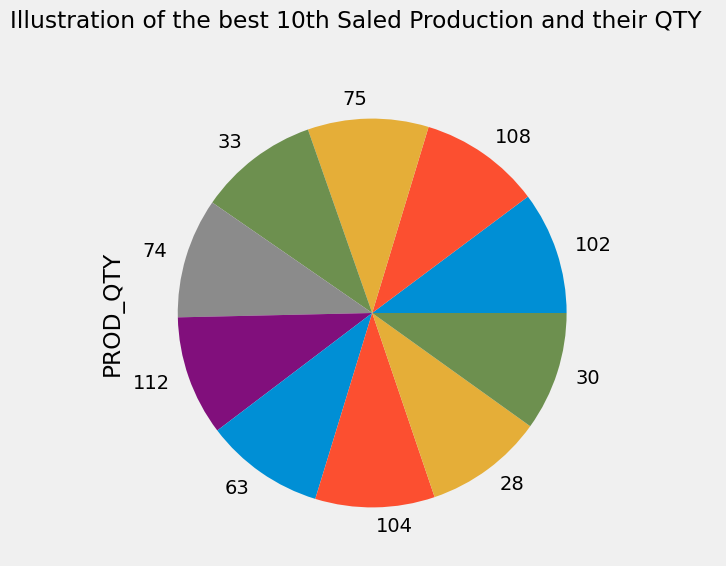

In [139]:
group_PROD_NBR = transaction[['PROD_NBR','PROD_QTY']]
grouped_PROD = group_PROD_NBR.groupby(['PROD_NBR']).sum()
grouped_PROD.sort_values(['PROD_QTY'],ascending=False)[:10].plot(kind = "pie", subplots= True,figsize = (6,6),legend = False
                                                                ,title = "Illustration of the best 10th Saled Production and their QTY  ")

#### ROD_NBR, PROD_QTY and TOT_SALES

In [140]:
group_PROD_NBR_SALES = transaction[['PROD_NBR','PROD_QTY','TOT_SALES']]
grouped_PROD_SALES = group_PROD_NBR_SALES.groupby(['PROD_NBR']).sum()
grouped_PROD_SALES.sort_values(['TOT_SALES'],ascending=False)[:10]

,PROD_QTY,TOT_SALES
PROD_NBR,,
4,6109,39052.0
14,6164,36367.6
16,6106,34804.2
102,6381,34457.4
7,6018,34302.6
23,6017,34296.9
20,5858,33390.6
89,6120,33031.8
46,6064,32740.2


- It can be seen that the data contains outliers and the scatter plot above illustrates that the PROD_QTY with 200 is an outlier value, but style rough to decide if we can drop it or not

####################


## 2) Purchase_behaviour -----------------------------------

This part is specified to analyse the second dataset of **purchased_behaviour**

In [141]:
purchase_behaviour = pd.read_csv(r"/content/QVI_purchase_behaviour.csv")
purchase_behaviour.head(20)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [142]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [143]:
# Check duplicate card numbers
purchase_behaviour.LYLTY_CARD_NBR.duplicated().sum()

0

In [144]:
# Missing Values
purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

- ZERO missing values

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


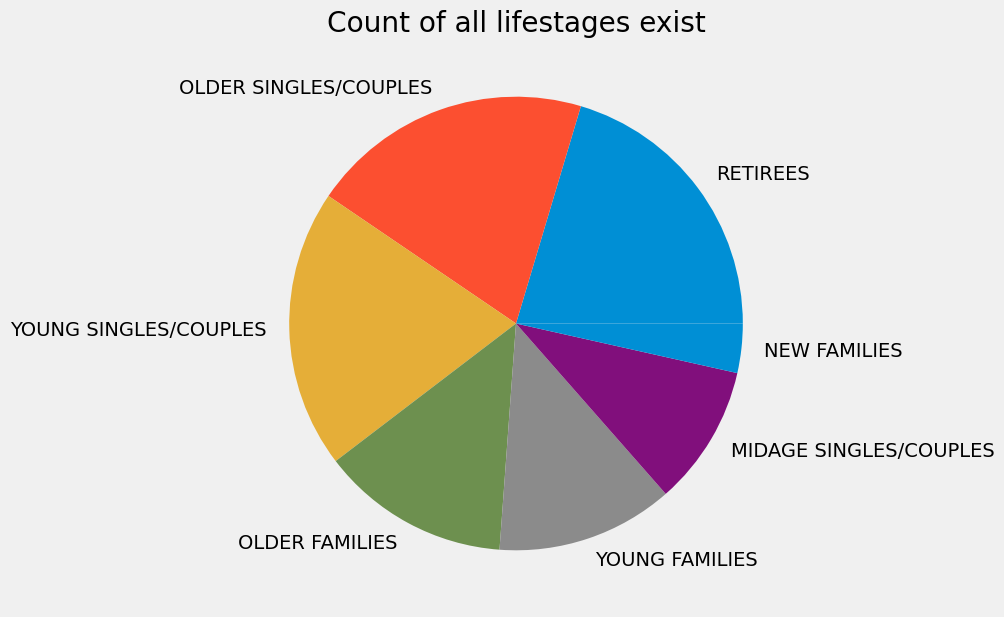

In [145]:
print(purchase_behaviour['LIFESTAGE'].value_counts())
purchase_behaviour['LIFESTAGE'].value_counts().plot.pie(figsize=(7,7),title = "Count of all lifestages exist",legend = False,
                                                       ylabel = "");

- obvious that LIFESTAGE contains 7 classes

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


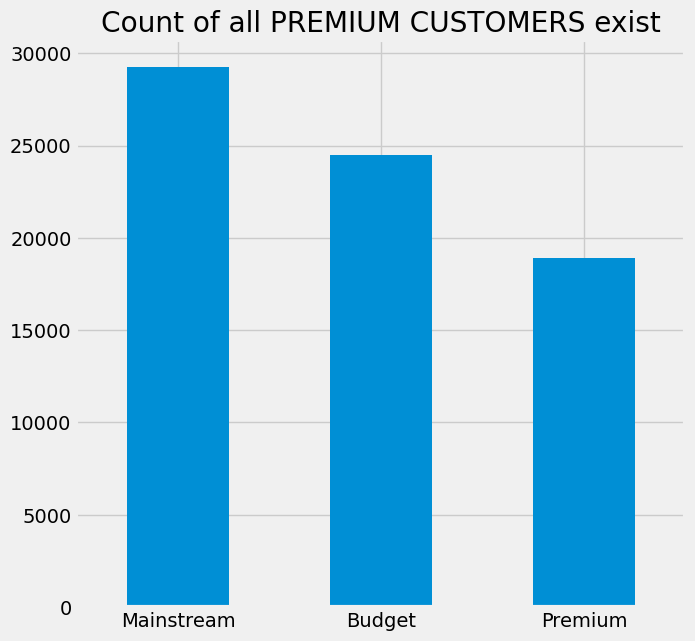

In [146]:
# PREMIUM_CUSTOMER
print(purchase_behaviour['PREMIUM_CUSTOMER'].value_counts())
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts().plot.bar(figsize=(7,7),title = "Count of all PREMIUM CUSTOMERS exist",legend = False,
                                                       ylabel = "",rot = 0);

Depending on the illustration above of the bar graph Mainstream has the high amount with 29245 purhasing time fllowed by Budget and Premium with 24470  and 18922 respectively

<Axes: ylabel='LIFESTAGE'>

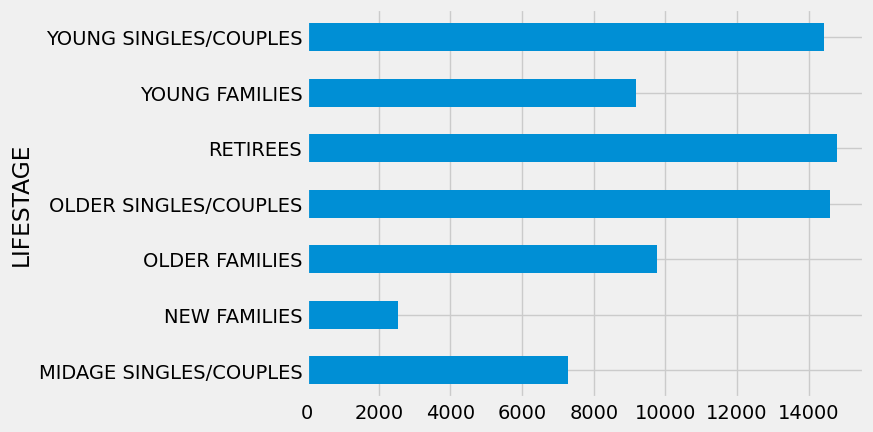

In [147]:
(purchase_behaviour[['LIFESTAGE','PREMIUM_CUSTOMER']].groupby('LIFESTAGE').count()).plot.barh(legend = False)

In [148]:
purchase_behaviour[['LIFESTAGE','PREMIUM_CUSTOMER']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PREMIUM_CUSTOMER'].count()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    1504
                  NEW FAMILIES              1112
                  OLDER FAMILIES            4675
                  OLDER SINGLES/COUPLES     4929
                  RETIREES                  4454
                  YOUNG FAMILIES            4017
                  YOUNG SINGLES/COUPLES     3779
Mainstream        MIDAGE SINGLES/COUPLES    3340
                  NEW FAMILIES               849
                  OLDER FAMILIES            2831
                  OLDER SINGLES/COUPLES     4930
                  RETIREES                  6479
                  YOUNG FAMILIES            2728
                  YOUNG SINGLES/COUPLES     8088
Premium           MIDAGE SINGLES/COUPLES    2431
                  NEW FAMILIES               588
                  OLDER FAMILIES            2274
                  OLDER SINGLES/COUPLES     4750
                  RETIREES                  3872
                  YOUNG FAMI